## 1.이항분류
- 합격/불합격 판정
- 3과목의 평균 60점 이상 합격, 과락 40점미만

### 1-01. 함수 생성

In [1]:
# 사용할 라이브러리 import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# sample로 사용할 DataSet을 생성하는 함수 작성
# X: 국어, 영어, 수학 점수
# Y: 합격여부 (X의 평균 60이상, 과락 40점 미만)

# seedno : 랜덤 수 생성 규칙
# size : 랜덤 수 생성 행의 수
# step=0 (균형), step=다른수 (불균형)

def make_sample(seedno,size,step=0):
  colnames = ['국어','영어','수학']
  np.random.seed(seedno)
  A = np.random.randint(0,101,(size,3))
  df = pd.DataFrame(A,columns = colnames)
  df['합격여부'] = (df.mean(axis=1)>=60) & (df.min(axis=1)>=40)
  if step == 0:
    F,T = df['합격여부'].value_counts() #합격,불합격의 개수
    B = np.random.randint(60,101,(F-T,3))
    df2 = pd.DataFrame(B,columns = colnames)
    df2['합격여부'] = True
    df = pd.concat([df,df2])
    df.index = pd.RangeIndex(len(df))
  df['합격여부'] = df['합격여부'].replace({True: 1, False: 0})
  return df

In [3]:
# 균형 데이터
data = make_sample(1234,1000)
data['합격여부'].value_counts()

,count
합격여부,
0,814
1,814


In [4]:
# 불균형 데이터
data = make_sample(1233,1000,step=1)
data['합격여부'].value_counts()

,count
합격여부,
0,816
1,184


In [5]:
data.head()

,국어,영어,수학,합격여부
0,16,56,38,0
1,58,24,75,0
2,16,71,19,0
3,39,58,13,0
4,80,23,57,0


In [6]:
# 모델 학습 및 성능 평가 함수 생성
### 1.이항분류
#- 합격/불합격 판정
#- 3과목의 평균 60점 이상 합격, 과락 40점미만


def ModelTrain(model,data):

  #1) X,Y 데이터 분리
  X = data.iloc[:,:-1]
  Y = data['합격여부']

  #2) 학습,평가 데이터 분리
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

  #3) 분리한 데이터 shape 분석
  print( [x.shape for x in [x_train,x_test,y_train,y_test]])

  #4) 학습 모델 데이터 선택,학습
  model.fit(x_train,y_train)

  #5) 성능평가
  print('train 성능: ', model.score(x_train,y_train))
  print('test 성능: ', model.score(x_test,y_test))
  return model


### 1-02. 데이터의 중요성

In [ ]:
# 충분한 데이터가 필요한 이유를 알아보겠습니다.

In [7]:
# 균형 데이터   # 1234, 1225, 1245
for no in [1234, 1225, 1245]:
  model_1 = LogisticRegression(max_iter=1000)
  data = make_sample(seedno=no,size=20000)
  ModelTrain(model_1,data)

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.949701652386781
test 성능:  0.9475214198286414
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9479039167686658
test 성능:  0.9495104039167687
[(26088, 3), (6522, 3), (26088,), (6522,)]
train 성능:  0.9467187979147501
test 성능:  0.9385157927016252


In [8]:
# 불균형 데이터
for no in [1234,1225,1245]:
  model_2=LogisticRegression(max_iter=1000)
  data = make_sample(seedno=no,step=1,size=20000)
  ModelTrain(model_2,data)

[(16000, 3), (4000, 3), (16000,), (4000,)]
train 성능:  0.924625
test 성능:  0.92225
[(16000, 3), (4000, 3), (16000,), (4000,)]
train 성능:  0.9190625
test 성능:  0.91775
[(16000, 3), (4000, 3), (16000,), (4000,)]
train 성능:  0.9195625
test 성능:  0.9165


In [9]:
# 부족한 데이터   # 1234, 1225, 1245
for no in [1234,1225,1245]:
  model_3 = LogisticRegression(max_iter=1000)
  data = make_sample(seedno=no,size=40)
  ModelTrain(model_3,data)

[(52, 3), (14, 3), (52,), (14,)]
train 성능:  1.0
test 성능:  1.0
[(51, 3), (13, 3), (51,), (13,)]
train 성능:  0.9411764705882353
test 성능:  0.8461538461538461
[(57, 3), (15, 3), (57,), (15,)]
train 성능:  1.0
test 성능:  0.8666666666666667


이 결과에서 주요 문제점은 다음과 같습니다:



*   **과적합 가능성**: 훈련 성능이 매우 높은 경우(특히 1.0)가 반복적으로 나타나는 경우 과적합이 발생할 가능성이 큽니다.


*   **일반화 문제**: 훈련 성능과 테스트 성능 간의 차이가 크다면, 모델이 일반화 능력이 부족할 수 있습니다.


*   **작은 데이터 세트**: 데이터 크기가 작아서 모델 성능의 신뢰성이 떨어질 수 있습니다

이 문제를 해결하기 위해서는 더 큰 데이터 세트에서 모델을 평가하고, 과적합을 방지하기 위한 방법(예: 규제화, 교차 검증 등)을 고려할 필요가 있습니다.


In [10]:
# 부족한, 불균형 데이터 # 1234, 1225, 1245
for no in [1234,1225,1245]:
  model_4 = LogisticRegression(max_iter=1000)
  data = make_sample(seedno=no,step=1,size=60)
  ModelTrain(model_4,data)

[(48, 3), (12, 3), (48,), (12,)]
train 성능:  1.0
test 성능:  1.0
[(48, 3), (12, 3), (48,), (12,)]
train 성능:  0.8541666666666666
test 성능:  0.8333333333333334
[(48, 3), (12, 3), (48,), (12,)]
train 성능:  0.9583333333333334
test 성능:  0.8333333333333334


### 1-03. 파생변수 사용
- 합격/불합격 여부를 결정하는 평균, 과락에 관련된 파생변수를 추가하여 봅니다.

In [11]:
# 데이터 생성
data = make_sample(seedno=1245,size=20000)
data.head(2)

,국어,영어,수학,합격여부
0,37,75,3,0
1,21,32,70,0


In [12]:
# 파생변수 생성/추가
data['평균'] = data[['국어','영어','수학']].mean(axis=1)
data['최소'] = data[['국어','영어','수학']].min(axis=1)
data.head()

,국어,영어,수학,합격여부,평균,최소
0,37,75,3,0,38.333333,3
1,21,32,70,0,41.000000,21
2,44,83,42,0,56.333333,42
3,22,9,11,0,14.000000,9
4,52,73,5,0,43.333333,5


In [13]:
for no in [1234,1225,1245]:
  model_5 = LogisticRegression(max_iter=1000)
  data = make_sample(seedno=no,size=20000)
  data['평균'] = data[['국어','영어','수학']].mean(axis=1)
  data['최소'] = data[['국어','영어','수학']].min(axis=1)
  ModelTrain(model_5,data)

[(26144, 5), (6536, 5), (26144,), (6536,)]
train 성능:  1.0
test 성능:  1.0
[(26144, 5), (6536, 5), (26144,), (6536,)]
train 성능:  1.0
test 성능:  1.0
[(26088, 5), (6522, 5), (26088,), (6522,)]
train 성능:  1.0
test 성능:  1.0


In [14]:
data

,국어,영어,수학,합격여부,평균,최소
0,37,75,3,0,38.333333,3
1,21,32,70,0,41.000000,21
2,44,83,42,0,56.333333,42
3,22,9,11,0,14.000000,9
4,52,73,5,0,43.333333,5
...,...,...,...,...,...,...
32605,60,63,97,1,73.333333,60
32606,78,93,71,1,80.666667,71
32607,84,99,70,1,84.333333,70
32608,65,67,78,1,70.000000,65


In [15]:
# 모든 값을 사용한 예측 결과
def make_all():
  colnames = ['국어','영어','수학']
  data = [[kor,eng,mat] for kor in range(101) for eng in range(101) for mat in range(101)]
  data = pd.DataFrame(data,columns=colnames)
  data['평균'] = data[['국어','영어','수학']].mean(axis=1)
  data['최소'] = data[['국어','영어','수학']].min(axis=1)
  data['합격여부'] = (data['평균'] >= 60) & (data['최소'] >=40) #합격 1,불합격 0
  data['합격여부'] = data['합격여부'].replace({True:1,False:0})
  return data

In [16]:
data = make_all()
X1 = data.iloc[:, :3]
Y = data['합격여부']
print(Y.value_counts())

for x in model_1, model_2, model_3, model_4:
    print(x.score(X1, Y))

합격여부
0    841140
1    189161
Name: count, dtype: int64
0.9204543138364419
0.9213375508710562
0.912767239864855
0.90907899730273


### 1-04. 스케일러 사용

In [17]:
for no in [1234,1225,1245]:
  model_6 = LogisticRegression(max_iter=1000)
  data = make_sample(seedno=no,size=20000)
  data['국어'] *= 500
  data['수학'] *= 1000
  ModelTrain(model_6,data)

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.5
test 성능:  0.5
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.5
test 성능:  0.5
[(26088, 3), (6522, 3), (26088,), (6522,)]
train 성능:  0.5
test 성능:  0.5


In [18]:
# StancardScaler 사용하여 정규 분포 만들기
from sklearn.preprocessing import StandardScaler

for no in [1234,1225,1245]:
  model_7 = LogisticRegression(max_iter=1000)
  data = make_sample(seedno=no,size=20000)
  data['국어'] *= 500
  data['수학'] *= 1000
  X = data[['국어','영어','수학']]
  Y = data['합격여부']
  scaledX = StandardScaler().fit_transform(X)
  scaledX = pd.DataFrame(scaledX,columns=['국어','영어','수학'])
  data = pd.concat([scaledX,Y],axis=1)
  ModelTrain(model_7,data)

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9497399020807834
test 성능:  0.9475214198286414
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9478656670746634
test 성능:  0.9495104039167687
[(26088, 3), (6522, 3), (26088,), (6522,)]
train 성능:  0.9468721251149954
test 성능:  0.9386691199018706


### 1-05. 다양한 모델의 사용

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### A) **데이터 생성**

In [20]:
# 학습용 데이터
data = make_sample(seedno = 1234,size=20000)
# 평가용 데이터
all = make_all()
X = all.iloc[:,:3]
Y = all['합격여부']

In [21]:
all.head()

,국어,영어,수학,평균,최소,합격여부
0,0,0,0,0.000000,0,0
1,0,0,1,0.333333,0,0
2,0,0,2,0.666667,0,0
3,0,0,3,1.000000,0,0
4,0,0,4,1.333333,0,0


#### B) **LogisticRegression**
- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
- https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80
- 반복하면서 기울기 값을 갱신, 기울기 미분값이 0이 되는 지점을 찾음  
- max_iter, tol 등을 변경하여 성능을 개선할 수 있음
- max_iter : 반복횟수
- tol : 허용오차, 반복을 중단하는 조건으로 사용됨
- panalty : panalty 종류
- C : panalty 세기
- (penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

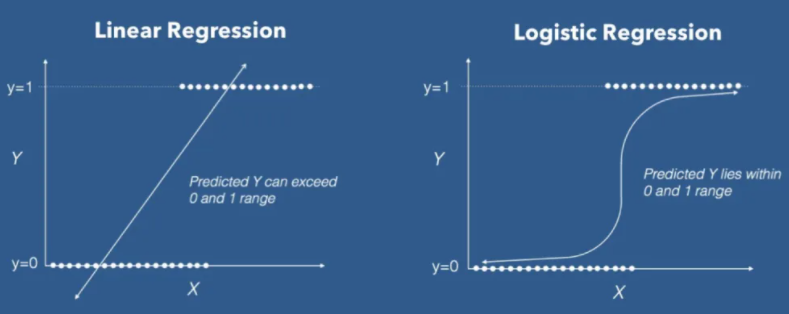

In [ ]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [22]:
model_lr = LogisticRegression(max_iter=1000)
ModelTrain(model_lr, data)
print(model_lr.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.949701652386781
test 성능:  0.9475214198286414
0.9202786370196671


#### C) **KNeighborsClassifier**
- k 개의 근접 이웃을 확인하여 클래스를 선택함
- n_neighbors를 변경하여 성능을 개선할 수 있음
- n_neighbors : 확인할 근접 이웃 개수
- (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

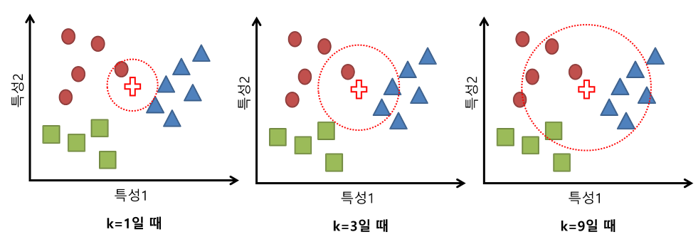

- 출처 : https://bskyvision.com/563?category=635506

In [23]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [24]:
for k in range(3,10):
  model_knn = KNeighborsClassifier(n_neighbors = k)
  ModelTrain(model_knn,data)
  print(f'k={k}, {model_knn.score(X,Y)}')

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9980492656058751
test 성능:  0.9946450428396573
k=3, 0.9912569239474678
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.997093023255814
test 성능:  0.9943390452876377
k=4, 0.9905745990734747
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.997360771113831
test 성능:  0.9937270501835985
k=5, 0.9917014542352186
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.996672276621787
test 성능:  0.9932680538555692
k=6, 0.9912666298489471
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9973990208078335
test 성능:  0.9951040391676866
k=7, 0.9920576608195081
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9961750305997552
test 성능:  0.9935740514075887
k=8, 0.9916189540726448
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9965957772337821
test 성능:  0.9941860465116279
k=9, 0.992152778654005


#### D) **DecisionTreeClassifier**
- overfitting 경향이 있음
- max_depth를 줄이는 방법으로 overfitting 해결
- (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

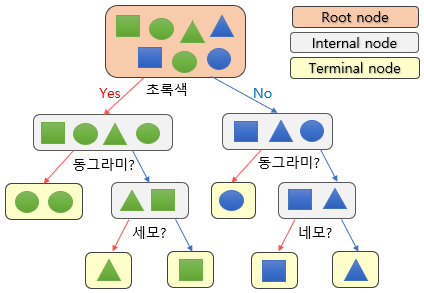

In [25]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [33]:
model_dc1 = DecisionTreeClassifier()
ModelTrain(model_dc1,data)
print(model_dc1.score(X,Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9954100367197063
0.9936271050887071


In [34]:
# 학습된 랜덤 포레스트 모델의 트리 깊이를 반환합니다.
model_dc1.get_depth()

12

In [38]:
model_dc2 = DecisionTreeClassifier(max_depth=6)
ModelTrain(model_dc2,data)
print(model_dc2.score(X,Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9951805385556916
test 성능:  0.9928090575275398
0.9888459780200155


In [41]:
model_dc3 = DecisionTreeClassifier(max_depth=3)
ModelTrain(model_dc3,data)
print(model_dc3.score(X,Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9645042839657283
test 성능:  0.9600673194614443
0.9383908197701448


In [43]:
for i in range(3,10):
  model_DCTC = DecisionTreeClassifier(max_depth=i)
  ModelTrain(model_DCTC,data)
  print(f'i = {i}, {model_DCTC.score(X,Y)}')

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9645042839657283
test 성능:  0.9600673194614443
i = 3, 0.9383908197701448
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9869951040391677
test 성능:  0.9850061199510404
i = 4, 0.9754052456515135
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9890605875152999
test 성능:  0.9873011015911872
i = 5, 0.9790546646077214
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9951805385556916
test 성능:  0.9928090575275398
i = 6, 0.9888459780200155
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9961750305997552
test 성능:  0.9940330477356181
i = 7, 0.989992244984718
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9977050183598531
test 성능:  0.9951040391676866
i = 8, 0.9919955430500407
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  0.9992350061199511
test 성능:  0.9952570379436965
i = 9, 0.9931524865063704


#### E) **RandomForestClassifier**
- DecisionTreeClassifier를 100개 사용하는 앙상블 모델
- n_estimators의 개수를 늘리거나, max_depth의 숫자를 조절하는 방법으로 성능 조절 가능
- (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

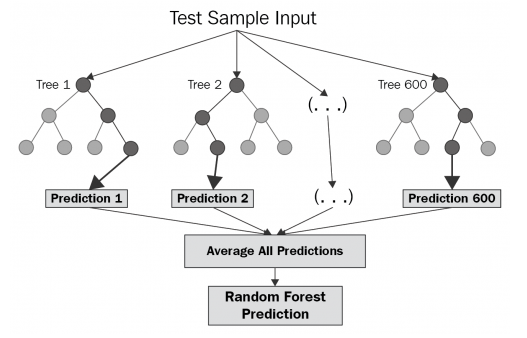
- 출처 : ```http://itwiki.kr/w/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8```

In [44]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [47]:
model_rf1 = RandomForestClassifier()
ModelTrain(model_rf1,data)
print(model_rf1.score(X,Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9975520195838433
0.9960166980329049


In [48]:
# n_estimators=500은 500개의 결정 트리를 생성
model_rf2 = RandomForestClassifier(n_estimators=500)
ModelTrain(model_rf2,data)
print(model_rf2.score(X,Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9977050183598531
0.9961894630792361


#### F) **XGBClassifier**


In [50]:
from xgboost import XGBClassifier

In [52]:
model_xgb1 = XGBClassifier()
ModelTrain(model_xgb1,data)
print(model_xgb1.score(X,Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9980110159118727
0.9966281698260994


In [54]:
model_xgb2 = XGBClassifier(n_estimators=500,max_depth = 5)
ModelTrain(model_xgb2,data)
print(model_xgb2.score(X,Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9980110159118727
0.9966184639246201


In [57]:
for i in range(3,10):
  model_XGB = XGBClassifier(n_estimators=500,max_depth = i)
  ModelTrain(model_XGB,data)
  print(f'i = {i}, model_XGB.score(X,Y)')

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9983170134638923
i = 3, model_XGB.score(X,Y)
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9975520195838433
i = 4, model_XGB.score(X,Y)
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9980110159118727
i = 5, model_XGB.score(X,Y)
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9981640146878825
i = 6, model_XGB.score(X,Y)
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9975520195838433
i = 7, model_XGB.score(X,Y)
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9981640146878825
i = 8, model_XGB.score(X,Y)
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능:  1.0
test 성능:  0.9980110159118727
i = 9, model_XGB.score(X,Y)


### 1-06. 성능평가


In [63]:
# 앞서 성능이 좋았던 RandomForestClassifier를 사용하여 모델을 생성합니다.
data = make_sample(seedno=1234,size=50000)
model_rf = RandomForestClassifier(n_estimators=500)
ModelTrain(model_rf,data)
print(model_rf.score(X,Y))

[(65348, 3), (16338, 3), (65348,), (16338,)]
train 성능:  1.0
test 성능:  0.9985310319500551
0.9971639355877554


In [65]:
# 앞서 성능이 좋았던 XGBClassifier를 사용하여 모델을 생성합니다.
data = make_sample(seedno=1234,size=50000)
model_xgb = XGBClassifier(n_estimators=500,max_depth=3)
ModelTrain(model_xgb,data)
print(model_xgb.score(X,Y`w   ))

[(65348, 3), (16338, 3), (65348,), (16338,)]
train 성능:  1.0
test 성능:  0.9985310319500551
0.9979928195740856


오분류표
- sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
- y_ture: 실제값
- y_pred: 예측값


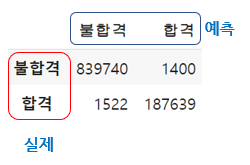

In [72]:
# RandomForestClassifier의 각 종류별 정확도를 확인해 보도록 합니다.
from sklearn.metrics import confusion_matrix
label = ['불합격','합격']
print(model_rf.score(X,Y))
y_pred = model_rf.predict(X)
a = confusion_matrix(Y,y_pred)
b = pd.DataFrame(a,columns=label,index=label)
b

0.9971639355877554


,불합격,합격
불합격,839740,1400
합격,1522,187639


In [77]:
# XGBClassifier의 각 종류별 정확도를 확인해 보도록 합니다.
from sklearn.metrics import confusion_matrix
label = ['불합격','합격']
print(model_xgb.score(X,Y))
y_pred = model_xgb.predict(X)
a = confusion_matrix(Y,y_pred)
b = pd.DataFrame(a,columns=label,index=label)
b

0.9979928195740856


,불합격,합격
불합격,840021,1119
합격,949,188212


In [84]:
# 합격일 확률 구하기 (다른 데이터 사용)
from sklearn.metrics import confusion_matrix
x_test = data[['국어','영어','수학']]
y_test = data['합격여부']
print(x_test.to_numpy())
print(model_xgb.predict(x_test))
proba = model_xgb.predict_proba(x_test)
print(proba)

[[47 83 38]
 [53 76 24]
 [15 49 23]
 ...
 [78 85 99]
 [63 65 81]
 [71 98 68]]
[0 0 0 ... 1 1 1]
[[9.9999994e-01 3.9867189e-08]
 [1.0000000e+00 1.2467388e-08]
 [1.0000000e+00 1.1599985e-22]
 ...
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]]


### 1-07. 예측값 저장

In [92]:
# test 데이터에서 '합격'일 확률에 대한 정보를 저장하여 출력합니다
submission = pd.DataFrame()
submission['id'] = pd.RangeIndex(1,len(X)+1)
submission['prob'] = model_xgb.predict_proba(X)[:,1]
submission.to_csv('submission.csv',index=False)

In [94]:
submission

,id,prob
0,1,5.935474e-26
1,2,5.935474e-26
2,3,5.935474e-26
3,4,5.935474e-26
4,5,5.935474e-26
...,...,...
1030296,1030297,1.000000e+00
1030297,1030298,1.000000e+00
1030298,1030299,1.000000e+00
1030299,1030300,1.000000e+00
